In [ ]:
import pickle
import matplotlib.pyplot as plt
from Mass_calculator import Mass
import numpy as np
from math import pi

In [2]:
with open('Data_Dict_SIunits.pkl', 'rb') as pickle_file:
    Data_Dict_loaded = pickle.load(pickle_file)

## Getting the right indexes

In [3]:
timestamps = [19*60, 21*60 + 25, 24*60 + 22, 26 * 60 + 18, 27*60 + 59, 29*60 + 47 ]
list_of_indexes = []
for i in timestamps:
    one_index = np.where(i == Data_Dict_loaded['time'])
    one_index = one_index[0][0] #+ 1
    list_of_indexes.append(one_index)
    # print(list_of_indexes)
    # print("-------")

In [4]:
list_of_indexes

[11310, 12760, 14530, 15690, 16700, 17780]

## Main part

In [5]:
def rho_calculation(P,T,R):
    rho = P/(R*T)
    return rho
def weight_calculation(W0,F_right,F_left):
    obj = Mass()
    return obj.NewMass_calculator()
def CL_coefficient(Wi,rho,S,V_TAS):
    CL = Wi*9.81/(1/2*rho*S*(V_TAS)**2)
    return CL

def pressure(T0,h,a,R,T1,P0,g):
    P1 = P0*(T1/T0)**(-g/(a*R))
    return P1

### !!!!!!!!!! Below numbers are a bit different than on the excel ...have to look into it

In [6]:
for i in list_of_indexes:
    print(Data_Dict_loaded['vane_AOA'][i]*180/pi)

1.356920643182255
2.053255767770007
3.398428212101213
4.56770004032922
7.983696829728386
10.53952603617298


In [7]:
W0 = 6082.91
S = 31.83
R = 287
a = -6.5*10**(-3)
g = 9.80665
T0 = 288.15
P0 = 101325
CL = []
Alpha = []

In [8]:

for i in list_of_indexes:#range(100,len(Data_Dict_loaded['vane_AOA']),1000):
    if Data_Dict_loaded['Dadc1_tas'][i] != 0:
        h = Data_Dict_loaded['Dadc1_bcAlt'][i]
        T1 = Data_Dict_loaded['Dadc1_sat'][i]
        P1 = pressure(T0, h, a, R, T1, P0, g)
        rho = rho_calculation(P1, T1, R)

        F_right = Data_Dict_loaded['rh_engine_FU'][i]
        F_left = Data_Dict_loaded['lh_engine_FU'][i]
        Weights_list = weight_calculation(W0,F_right,F_left)
        Wi = Weights_list[i]

        V_TAS = Data_Dict_loaded['Dadc1_tas'][i]
        Cl = CL_coefficient(Wi,rho,S,V_TAS)
        CL.append(Cl)
        Alpha.append(Data_Dict_loaded['vane_AOA'][i]*180/pi)


In [9]:
CL

[0.02081100409866359,
 0.0269577943802501,
 0.03714274920054164,
 0.04721049556552113,
 0.07476019653492447,
 0.09620200157437762]

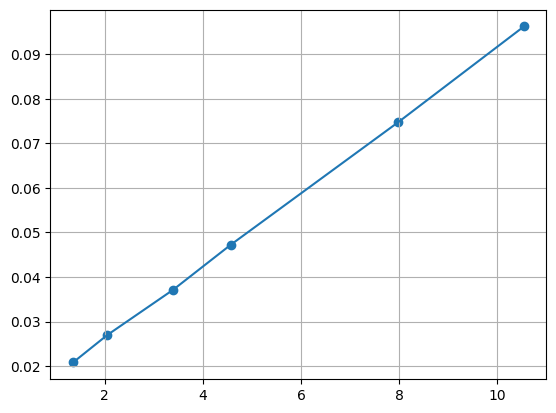

In [10]:
plt.plot(Alpha, CL)
plt.scatter(Alpha, CL)
plt.grid()
plt.show()